In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/Users/duthie/Desktop/Datathon/combined_airquality_2019_2023.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

In [3]:
print("Initial Data:")
print(data.head())

Initial Data:
  State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2019-01-03   24     Good   
1    Alabama     Baldwin           1            3  2019-01-06   47     Good   
2    Alabama     Baldwin           1            3  2019-01-09   18     Good   
3    Alabama     Baldwin           1            3  2019-01-12   48     Good   
4    Alabama     Baldwin           1            3  2019-01-15   50     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


In [4]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# 1. Basic summary statistics for AQI
summary_stats = data['AQI'].describe()
print("Summary Statistics for AQI:\n", summary_stats)

Summary Statistics for AQI:
 count    1.627533e+06
mean     4.255944e+01
std      2.469210e+01
min      0.000000e+00
25%      3.100000e+01
50%      4.100000e+01
75%      5.200000e+01
max      8.368000e+03
Name: AQI, dtype: float64


In [7]:
# 2. Count of AQI Categories
aqi_category_counts = data['Category'].value_counts()
print("\nAQI Category Counts:\n", aqi_category_counts)


AQI Category Counts:
 Category
Good                              1181755
Moderate                           424269
Unhealthy for Sensitive Groups      15883
Unhealthy                            4223
Very Unhealthy                        948
Hazardous                             455
Name: count, dtype: int64


In [9]:
# 3. AQI trend over time (averaging AQI by date)
aqi_trend = data.groupby('Date')['AQI'].mean()
print("\nAQI Trend (First 5 entries):\n", aqi_trend.head())


AQI Trend (First 5 entries):
 Date
2019-01-01    36.550258
2019-01-02    37.547097
2019-01-03    37.580941
2019-01-04    40.557125
2019-01-05    40.517330
Name: AQI, dtype: float64


In [11]:
# 4. Top 5 states with the highest average AQI
state_avg_aqi = data.groupby('State Name')['AQI'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 States with Highest Average AQI:\n", state_avg_aqi)


Top 5 States with Highest Average AQI:
 State Name
Country Of Mexico       61.643333
California              56.175963
District Of Columbia    49.905805
Arizona                 49.825768
Utah                    48.531999
Name: AQI, dtype: float64


In [13]:
# 5. Analysis of AQI by defining parameter (e.g., PM2.5, Ozone, etc.)
aqi_by_parameter = data.groupby('Defining Parameter')['AQI'].mean().sort_values(ascending=False)
print("\nAverage AQI by Defining Parameter:\n", aqi_by_parameter)


Average AQI by Defining Parameter:
 Defining Parameter
PM2.5    44.618449
Ozone    41.890547
PM10     31.512799
NO2      19.423894
CO        6.967989
Name: AQI, dtype: float64


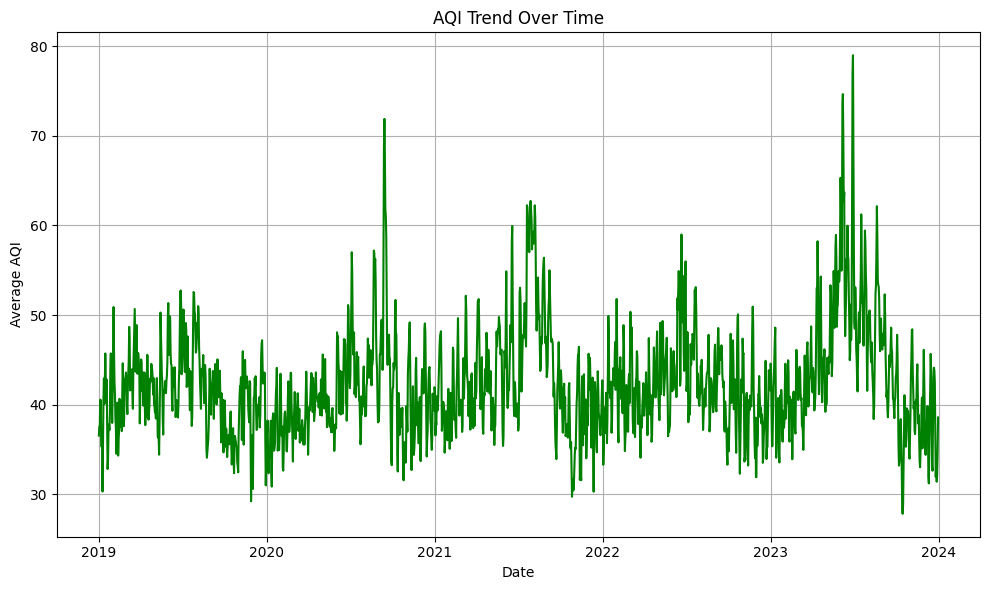

In [14]:
#  AQI Trend over Time
plt.figure(figsize=(10, 6))
plt.plot(aqi_trend.index, aqi_trend.values, color='green')
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.grid(True)
plt.tight_layout()
plt.show()

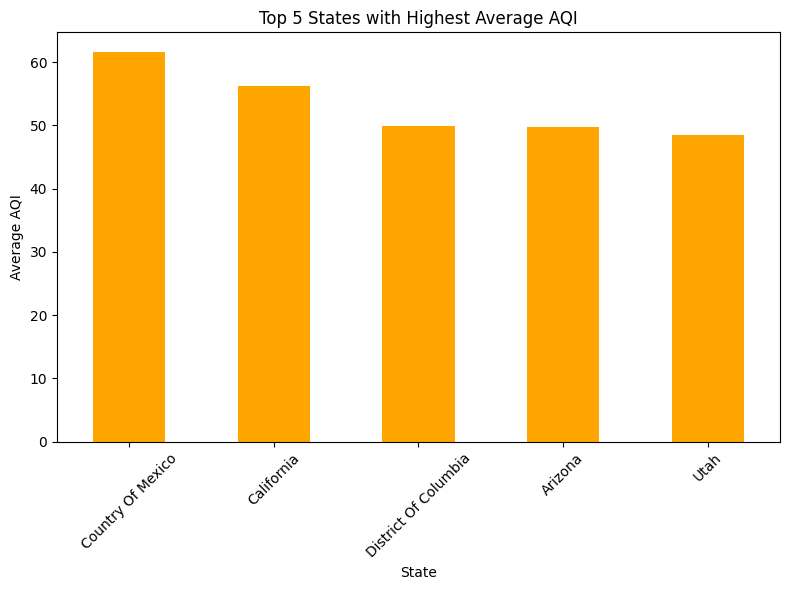

In [15]:
#  Top 5 States with Highest Average AQI
plt.figure(figsize=(8, 6))
state_avg_aqi.plot(kind='bar', color='orange')
plt.title('Top 5 States with Highest Average AQI')
plt.xlabel('State')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()